## Digit recognition - Neural networks

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tensorflow.autograph.set_verbosity(0)

## Numpy Zip File (npz)

In [2]:
data = np.load('mnist.npz')
for key in data.keys():
    print(key)

x_test
x_train
y_train
y_test


### Training sets

In [3]:
X_train = data["x_train"]
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)
y_train = data["y_train"]
y_train = y_train.reshape(-1, 1)
print(y_train.shape)

(60000, 784)
(60000, 1)


### Testing sets

In [4]:
X_test = data["x_test"]
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_test.shape)
y_test = data["y_test"]
y_test = y_test.reshape(-1, 1)
print(y_test.shape)

(10000, 784)
(10000, 1)


## Visualize the results

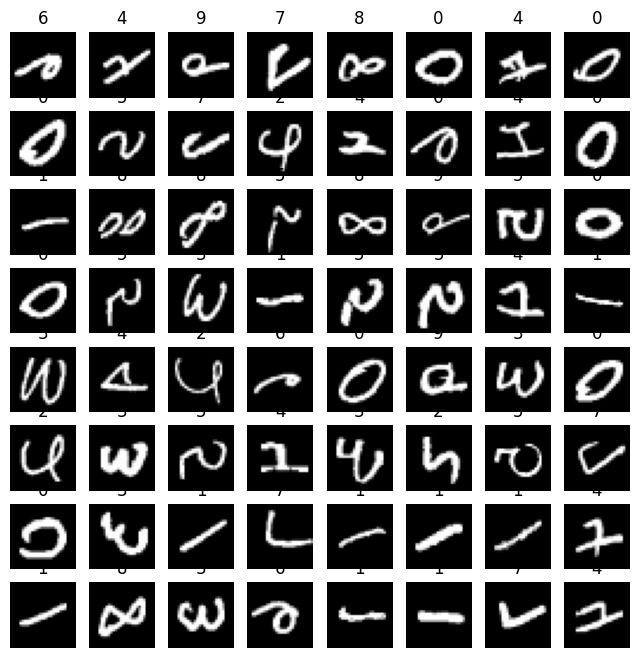

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_train.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index].reshape((28, 28)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    ax.set_title(y_train[random_index, 0])
    ax.set_axis_off()

![fishy](./NN_view.png)

In [6]:
model = Sequential(
    [
        tensorflow.keras.Input(shape = (784, )),
        Dense(25, activation = 'sigmoid'),
        Dense(15, activation = 'sigmoid'),
        Dense(1, activation = 'sigmoid'),
    ], name = "my_model"
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 20,031
Trainable params: 20,031
Non-trainable params: 0
_________________________________________________________________


In [7]:
layer1_params = 784 * 25 + 25
layer2_params = 25*15 + 15
layer3_params = 15*1 + 1
print("Layer-1: ", layer1_params, "Layer-2: ", layer2_params, "Layer-3: ", layer3_params)


Layer-1:  19625 Layer-2:  390 Layer-3:  16


In [9]:
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1, b1 = {W1.shape, b1.shape}")
print(f"W2, b2 = {W2.shape, b2.shape}")
print(f"W3, b3 = {W3.shape, b3.shape}")

W1, b1 = ((784, 25), (25,))
W2, b2 = ((25, 15), (15,))
W3, b3 = ((15, 1), (1,))


In [10]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.24331588],
       [ 0.24172068],
       [-0.5634024 ],
       [-0.10822105],
       [-0.5735353 ],
       [ 0.13383001],
       [ 0.5692677 ],
       [-0.60157686],
       [-0.16241777],
       [ 0.5194798 ],
       [-0.24835947],
       [ 0.33533573],
       [-0.07159919],
       [ 0.05903929],
       [ 0.41016012]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [11]:
model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = tensorflow.keras.optimizers.Adam(0.001),
)

In [13]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: -48.9781
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: -137.4524
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: -221.2469
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: -304.6273
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: -388.8978
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: -478.1111
Epoch 7/20
1875/1875 [==============================] - 2s 922us/step - loss: -584.6148
Epoch 8/20
1875/1875 [==============================] - 2s 912us/step - loss: -699.0164
Epoch 9/20
1875/1875 [==============================] - 2s 976us/step - loss: -805.9407
Epoch 10/20
1875/1875 [==============================] - 2s 990us/step - loss: -910.7234
Epoch 11/20
1875/1875 [==============================] - 2s 1ms/step - loss: -1016.3274
Epoch 12/20
1875/1875 [=====================

In [19]:
prediction1 = model.predict(X_test[1].reshape(1, 784))
print(f"Predicting a zero: {prediction1}")
prediction2 = model.predict(X_test[9999].reshape(1, 784))
print(f"Predicting a one: {prediction2}")

1/1 [==============================] - 0s 25ms/step
Predicting a zero: [[1.]]
1/1 [==============================] - 0s 28ms/step
Predicting a one: [[1.]]


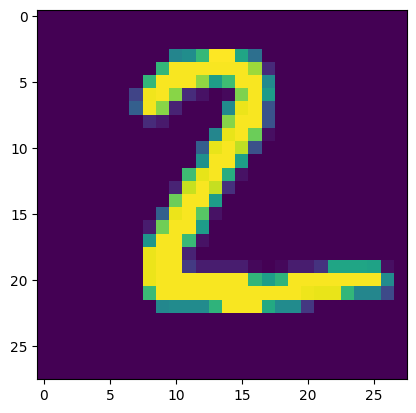

In [20]:
plt.imshow(X_test[1].reshape(28, 28))